###**MiniProject 5 - Forest Fire**



Part I
Data Source
https://www.kaggle.com/elikplim/forest-fires-data-set
Google Drive
https://drive.google.com/drive/u/1/folders/1uZTBgqKrf3xN5HKqHvJ4ZmyIm3TAykI0

For schema, see Appendix here

In [1]:
import pandas as pd
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py

In [2]:
df = pd.read_csv("/content/forestfires.csv")
df.head()
list(df.columns)
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


  
***1. Top 10 maximum burnt area happened on which month.***

In [3]:
df_burnt_area = df.sort_values(by=['area'], ascending=True).head(10)
print(tabulate(df_burnt_area , headers='keys', tablefmt='fancy_grid'))

╒═════╤═════╤═════╤═════════╤═══════╤════════╤═══════╤═══════╤═══════╤════════╤══════╤════════╤════════╤════════╕
│     │   X │   Y │ month   │ day   │   FFMC │   DMC │    DC │   ISI │   temp │   RH │   wind │   rain │   area │
╞═════╪═════╪═════╪═════════╪═══════╪════════╪═══════╪═══════╪═══════╪════════╪══════╪════════╪════════╪════════╡
│   0 │   7 │   5 │ mar     │ fri   │   86.2 │  26.2 │  94.3 │   5.1 │    8.2 │   51 │    6.7 │      0 │      0 │
├─────┼─────┼─────┼─────────┼───────┼────────┼───────┼───────┼───────┼────────┼──────┼────────┼────────┼────────┤
│ 298 │   8 │   6 │ jun     │ wed   │   91.2 │ 147.8 │ 377.2 │  12.7 │   19.6 │   43 │    4.9 │      0 │      0 │
├─────┼─────┼─────┼─────────┼───────┼────────┼───────┼───────┼───────┼────────┼──────┼────────┼────────┼────────┤
│ 299 │   6 │   5 │ jun     │ sat   │   53.4 │  71   │ 233.8 │   0.4 │   10.6 │   90 │    2.7 │      0 │      0 │
├─────┼─────┼─────┼─────────┼───────┼────────┼───────┼───────┼───────┼────────┼──────┼──

***2. Highest temperature and lowest temperature for each month.***

In [4]:
month_order = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}
df['month_num'] = df['month'].map(month_order)
df_sorted = df.sort_values(by=['month_num'])
high_temp = df_sorted.groupby('month')['temp'].max().reset_index()
low_temp = df_sorted.groupby('month')['temp'].min().reset_index()
high_temp['low_temp'] = low_temp['temp']
high_low_temp = high_temp.rename(columns={'temp': 'high_temp'})
print(tabulate(high_low_temp , headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤═════════════╤════════════╕
│    │ month   │   high_temp │   low_temp │
╞════╪═════════╪═════════════╪════════════╡
│  0 │ apr     │        17.6 │        5.8 │
├────┼─────────┼─────────────┼────────────┤
│  1 │ aug     │        33.3 │        5.1 │
├────┼─────────┼─────────────┼────────────┤
│  2 │ dec     │         5.1 │        2.2 │
├────┼─────────┼─────────────┼────────────┤
│  3 │ feb     │        15.7 │        4.2 │
├────┼─────────┼─────────────┼────────────┤
│  4 │ jan     │         5.3 │        5.2 │
├────┼─────────┼─────────────┼────────────┤
│  5 │ jul     │        30.2 │       12.6 │
├────┼─────────┼─────────────┼────────────┤
│  6 │ jun     │        28   │       10.6 │
├────┼─────────┼─────────────┼────────────┤
│  7 │ mar     │        18.8 │        5.3 │
├────┼─────────┼─────────────┼────────────┤
│  8 │ may     │        18   │       11.3 │
├────┼─────────┼─────────────┼────────────┤
│  9 │ nov     │        11.8 │       11.8 │
├────┼─────────┼─────────────┼──

***3. Monthly when highest wind and lowest wind happened.***

In [5]:
month_order = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}
df['month_num'] = df['month'].map(month_order)
df_sorted = df.sort_values(by=['month_num'])
df_wind = df.sort_values(by=['wind'], ascending=False)
high_wind = df_wind.groupby('month')['wind'].max().reset_index()
low_wind = df_wind.groupby('month')['wind'].min().reset_index()
high_wind['low_wind'] = low_wind['wind']
high_low_wind = high_wind.rename(columns={'wind': 'high_wind'})
print(tabulate(high_low_wind , headers='keys', tablefmt='sample'))

    month      high_wind    low_wind
--  -------  -----------  ----------
 0  apr              9.4         1.8
 1  aug              8.9         0.4
 2  dec              8.5         4.9
 3  feb              9.4         0.9
 4  jan              3.1         0.9
 5  jul              8           0.9
 6  jun              9.4         1.3
 7  mar              9.4         0.9
 8  may              4.9         4
 9  nov              4.5         4.5
10  oct              5.4         0.9
11  sep              7.6         0.9


***4. Highest and lowest relative humidity for each month.***

In [6]:
month_order = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}
df['month_num'] = df['month'].map(month_order)
df_sorted = df.sort_values(by=['month_num'])
df_humidity = df.sort_values(by=['RH'], ascending=False)
high_humidity = df_humidity.groupby('month')['RH'].max().reset_index()
low_humidity = df_humidity.groupby('month')['RH'].min().reset_index()
high_humidity['low_humidity'] = low_humidity['RH']
high_low_humidity = high_humidity.rename(columns={'RH': 'high_humidity'})
print(tabulate(high_low_humidity , headers='keys', tablefmt='pipe'))

|    | month   |   high_humidity |   low_humidity |
|---:|:--------|----------------:|---------------:|
|  0 | apr     |              75 |             20 |
|  1 | aug     |              96 |             19 |
|  2 | dec     |              61 |             21 |
|  3 | feb     |              82 |             35 |
|  4 | jan     |             100 |             78 |
|  5 | jul     |              90 |             22 |
|  6 | jun     |              90 |             25 |
|  7 | mar     |              99 |             18 |
|  8 | may     |              94 |             40 |
|  9 | nov     |              31 |             31 |
| 10 | oct     |              60 |             24 |
| 11 | sep     |              86 |             15 |


***5. Join the output from questions 1-4 above.***

In [7]:
merged_df = pd.merge(df_burnt_area, high_low_temp, on='month')
merged_df1 = pd.merge(merged_df, high_low_wind, on='month')
merged_df2 = pd.merge(merged_df1, high_low_wind, on='month', how='inner')
merged_df3 = pd.merge(merged_df2, high_low_humidity, on='month')
merged_df4 = pd.merge(merged_df3, high_low_humidity, on='month', how='inner')
final_merged_df = pd.merge(merged_df4, df_burnt_area[['month']], on='month', how='left')
print(tabulate(merged_df4 , headers='keys', tablefmt='fancy_grid'))

╒════╤═════╤═════╤═════════╤═══════╤════════╤═══════╤═══════╤═══════╤════════╤══════╤════════╤════════╤════════╤═════════════╤════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╤═══════════════════╤══════════════════╤═══════════════════╤══════════════════╕
│    │   X │   Y │ month   │ day   │   FFMC │   DMC │    DC │   ISI │   temp │   RH │   wind │   rain │   area │   high_temp │   low_temp │   high_wind_x │   low_wind_x │   high_wind_y │   low_wind_y │   high_humidity_x │   low_humidity_x │   high_humidity_y │   low_humidity_y │
╞════╪═════╪═════╪═════════╪═══════╪════════╪═══════╪═══════╪═══════╪════════╪══════╪════════╪════════╪════════╪═════════════╪════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╪═══════════════════╪══════════════════╪═══════════════════╪══════════════════╡
│  0 │   7 │   5 │ mar     │ fri   │   86.2 │  26.2 │  94.3 │   5.1 │    8.2 │   51 │    6.7 │      0 │      0 │        18.8 │        5.3 │           9.4 │     

***6. Plot a group bar chart for the output in question 5.***

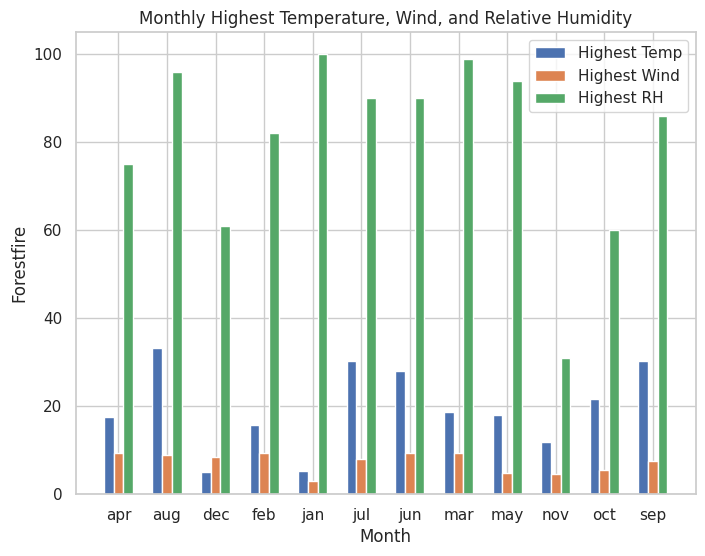

In [12]:
# Merge the dataframes
merged_df = pd.merge(high_low_temp, high_low_wind, on='month', how='inner')
merged_df = pd.merge(merged_df, high_low_humidity, on='month', how='inner')

# Create a grouped bar chart
plt.figure(figsize=(8, 6))

bar_width = 0.2
index = range(len(merged_df))

plt.bar(
    [i - bar_width for i in index],
    merged_df['high_temp'],
    width=bar_width,
    label='Highest Temp',
)
plt.bar(
    index,
    merged_df['high_wind'],
    width=bar_width,
    label='Highest Wind',
)
plt.bar(
    [i + bar_width for i in index],
    merged_df['high_humidity'],
    width=bar_width,
    label='Highest RH',
)

plt.xlabel('Month')
plt.ylabel('Forestfire')
plt.title('Monthly Highest Temperature, Wind, and Relative Humidity')
plt.xticks(index, merged_df['month'])
plt.legend()
plt.show()